In [1]:
import pandas as pd
import seaborn as sns
# sns.set()
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# df = pd.read_csv('record_stats.csv', header=None)
# df.columns = ['cfg', 'elapsed', '# records', 'bytes']
# df['driver'] = df['cfg'].str.extract(r'/([a-z]+)_')

In [3]:
# d = df.groupby('cfg')['driver', '# records', 'bytes'].max()
# # ax1 = d.plot.scatter(x='# records', y='bytes', marker='o', hue='driver')
# sns.lmplot( x="# records", y="bytes", data=d, fit_reg=False, hue='driver', legend=False)

## BuildingSync

In [4]:
df = pd.read_csv('bsync_stats.csv', header=None)
df.columns = ['md_src', 'site', 'elapsed', '# records', '# triples']
df = df.groupby('site')[['md_src', '# records', '# triples']].max().reset_index()
df['triples_per_record'] = df['# triples'] / df['# records']
df
bsync_df = df

In [5]:
(df['# triples'] / df['# records']).describe()

count    17.000000
mean      2.281335
std       0.305526
min       2.000000
25%       2.000000
50%       2.363636
75%       2.444444
max       3.000000
dtype: float64

In [6]:
# fig_dims = (10,4)
# fig, ax = plt.subplots(figsize=fig_dims)
# # with sns.plotting_context("notebook", font_scale=2):
# # sns.scatterplot(x='# records', y='# triples', data=df, ax=ax, size=)
# ax.set_xlabel('# records', fontsize=16)
# ax.set_ylabel('# triples', fontsize=16)

## Haystack

In [7]:
fix_records = {
    'ghausi-improved': 2183,
    'vrtdump': 149,
    'alpha': 2032,
    'bravo': 1077,
    'charlie': 624,
    'carytown': 22,
    'gaithersburg': 147,
    'pes': 6474,
}

In [8]:
df = pd.read_csv('haystack_stats.csv', header=None)
df.columns = ['md_src', 'site', 'elapsed', '# records', '# triples']
df = df.groupby('site')[['md_src', '# records', '# triples']].max().reset_index()
for sitename, actual in fix_records.items():
    df.loc[df.site==sitename, '# records'] = actual
df['triples_per_record'] = df['# triples'] / df['# records']
haystack_df = df
df

,site,md_src,# records,# triples,triples_per_record
0,alpha,haystack,2032,7966,3.920276
1,bravo,haystack,1077,4557,4.231198
2,carytown,haystack,22,67,3.045455
3,charlie,haystack,624,2238,3.586538
4,gaithersburg,haystack,147,448,3.047619
5,ghausi-improved,haystack,2183,5513,2.525424
6,pes,haystack,6474,19426,3.000618
7,vrtdump,haystack,149,322,2.161074


## GBXML

In [9]:
df = pd.read_csv('gbxml_stats.csv', header=None)
df.columns = ['md_src', 'site', 'elapsed', '# records', '# triples']
df = df.groupby('site')[['md_src', '# records', '# triples']].max().reset_index()
df['triples_per_record'] = df['# triples'] / df['# records']
df
gbxml_df = df

## Modelica

In [10]:
df = pd.read_csv('modelica_stats.csv', header=None)
df.columns = ['md_src', 'site', 'elapsed', '# records', '# triples']
df = df.groupby('site')[['md_src', '# records', '# triples']].max().reset_index()
df['triples_per_record'] = df['# triples'] / df['# records']
df
modelica_df = df

# All Together

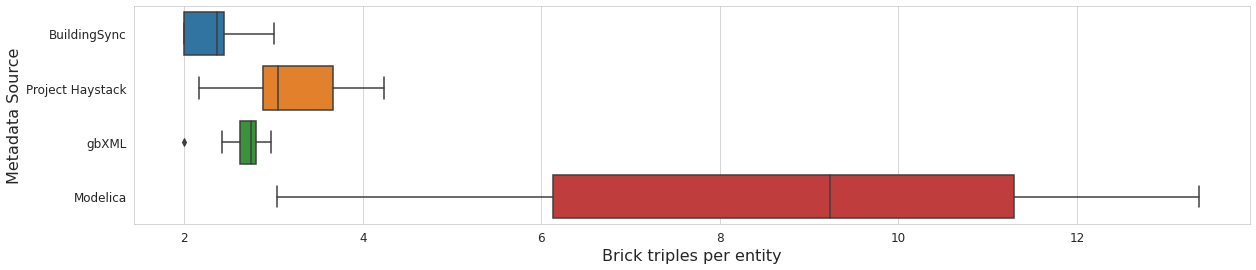

In [11]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
udf = pd.concat([bsync_df, haystack_df, gbxml_df, modelica_df])
udf.loc[udf.md_src=='bsync', 'md_src'] = 'BuildingSync'
udf.loc[udf.md_src=='haystack', 'md_src'] = 'Project Haystack'
udf.loc[udf.md_src=='gbxml', 'md_src'] = 'gbXML'
udf.loc[udf.md_src=='modelica', 'md_src'] = 'Modelica'
udf['Brick triples per record'] = udf['triples_per_record']
sns.boxplot(x='Brick triples per record', y='md_src', data=udf)
ax.set_ylabel('Metadata Source', fontsize=16)
ax.set_xlabel('Brick triples per entity', fontsize=16)
plt.savefig('triples_per_recdist.png', dpi=300)

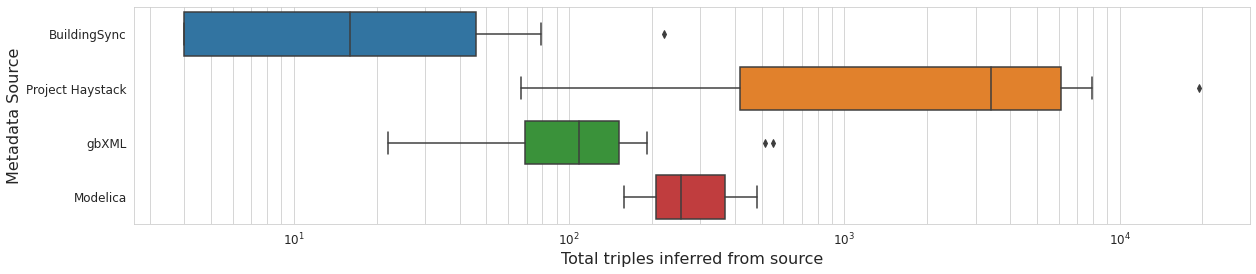

In [12]:
fig, ax = plt.subplots(figsize=fig_dims)
p = sns.boxplot(x='# triples', y='md_src', data=udf)
p.set(xscale='log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="minor", ls="-")
ax.set_ylabel('Metadata Source', fontsize=16)
ax.set_xlabel('Total triples inferred from source', fontsize=16)
plt.savefig('triples_dist.png', dpi=300)

In [13]:
udf.head()


,site,md_src,# records,# triples,triples_per_record,Brick triples per record
0,ASHRAE 211 Export,BuildingSync,22,46,2.090909,2.090909
1,AT_BRICR_audit_report,BuildingSync,22,52,2.363636,2.363636
2,AT_example_NYC_audit_report_property,BuildingSync,33,79,2.393939,2.393939
3,AT_example_SF_audit_report,BuildingSync,22,52,2.363636,2.363636
4,BuildingSync Website Valid Schema,BuildingSync,2,4,2.000000,2.000000


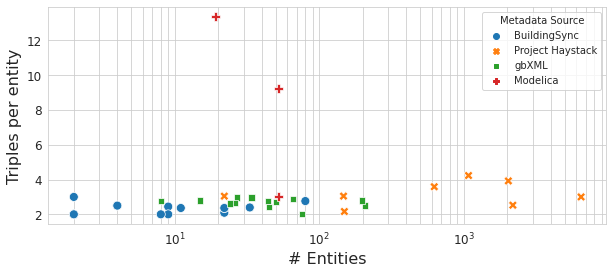

In [34]:
fig, ax = plt.subplots(figsize=(10, 4))
udf['Metadata Source'] = udf['md_src']
p = sns.scatterplot(x='# records', y='triples_per_record', style='Metadata Source', hue='Metadata Source', data=udf, s=80)
p.set(xscale='log')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which="minor", ls="-")
ax.set_ylabel('Triples per entity', fontsize=16)
ax.set_xlabel('# Entities', fontsize=16)
plt.savefig('triple_distribution_all.png', dpi=300)

In [45]:
udf.groupby('md_src').count()

,site,# records,# triples,triples_per_record,Brick triples per record
md_src,,,,,
BuildingSync,17,17,17,17,17
Modelica,3,3,3,3,3
Project Haystack,8,8,8,8,8
gbXML,13,13,13,13,13


In [ ]:
unique